### Packages

In [1]:
import numpy as np
from hcipy import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

%matplotlib inline
# %matplotlib notebook

#Import functions
from Functions import *

In [2]:
os.chdir('2-telescope-interferometer')

## 1. The 2-telescope interferometer

Set the wavelength @1$\mu$m.\
Set the diameter of the mirrors $D = 1$m separated by a distance $B = 2-50D$.\
Set the focal length to $10$m.

In [3]:
wl = 1e-6 # m
D = 1 # m
B = 3*D # m
f = 10 # m

### 2 ‘pinhole’ telescopes

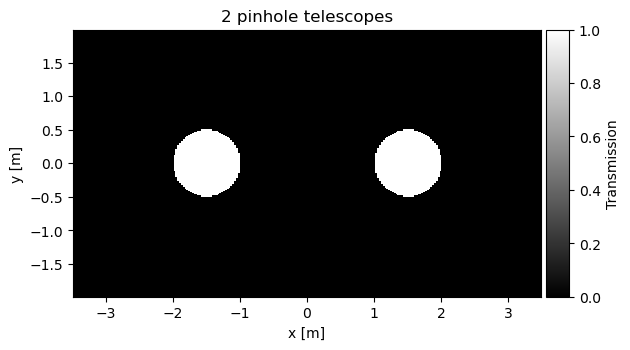

In [4]:
# place the two mirrors at pm B/2 on the x axis
x = [B/2,-B/2]
# align the mirrors on the y axis
y = [0.,0.]

# Generate the field and the pupil
field, pupil_grid = Interferometer(x,y,D)

# Plot the field of the mirrors
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'2 pinhole telescopes')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')

ax = plt.gca()
divider = make_axes_locatable(ax)
cax=divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, label=r'Transmission', cax=cax)

plt.savefig('2_telescopes_interferometer.png')

### Compute the PSF of the interferometer

$\underline{\text{Information contained:}}$

It contains information on the aperture shape, the phase, and the transmission.\
The low frequencies are concentrated in the middle and the higher ones are on the edge.\
It represents a single point object (in object plane) in the image plane.

If we compare this PSF to the PSF of a single aperture telescope of diameter $B$ ($B=$distance between the 2 mirrors) one will see that the PSFs are the same but the interferometer one will have vertical 'incoherent lines' because the mirrors are not large compared to their separation.

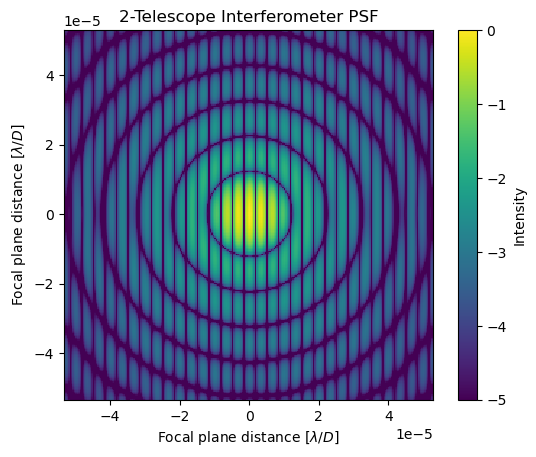

In [5]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)

# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'2-Telescope Interferometer PSF')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'Intensity')

plt.savefig('2_telescopes_interferometer_PSF.png')

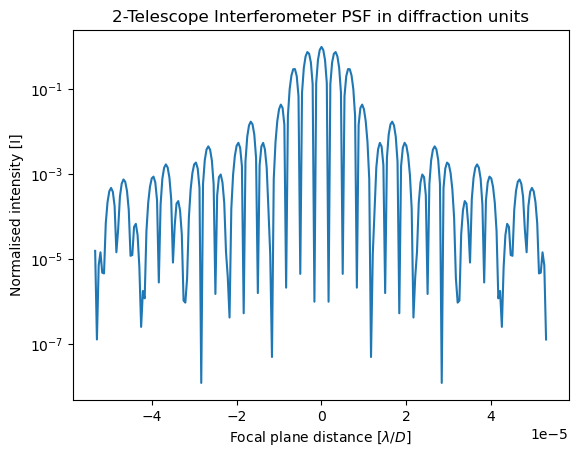

In [6]:
psf = focal_image.intensity
psf_shape = psf.grid.shape

slicefoc = psf.shaped[psf_shape[0] // 2, :]
slicefoc_normalised = slicefoc / psf.max()

# Plot a horizontal cut of the PSF
plt.plot(focal_grid.x.reshape(psf_shape)[0, :], slicefoc_normalised)
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Normalised intensity [I]')
plt.yscale('log')
plt.title(r'2-Telescope Interferometer PSF in diffraction units')

plt.savefig('2_telescopes_interferometer_PSF_diff_units.png')

### Compute the OTF of the 2-telescope interferometer

The OTF gives the strength with which a frequency is measured

$\underline{\text{Spatial filtering properties:}}$

We see that we have 3 spots. Meaning that the measured frequencies are stronger at those spots.\
Actually the 2 spots on each side represent the frequencies passing through each aperture.
And the one in the middle is the interfering frequencies and gives the equivalent telescope size at a given wavelength.

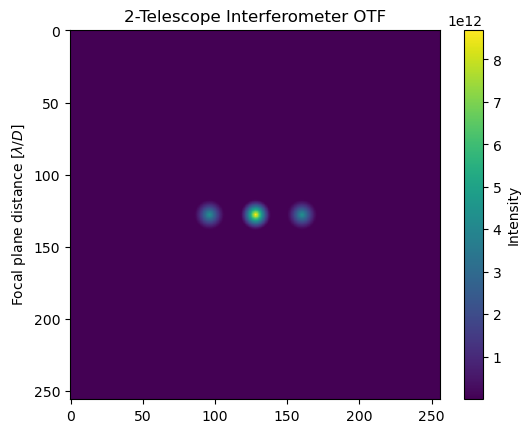

In [7]:
# Get the real part of the OTF
real_otf = Get_OTF(focal_image)

# Plot the OTF
plt.imshow(real_otf)
plt.title(r'2-Telescope Interferometer OTF')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'Intensity')

plt.savefig('2_telescopes_interferometer_OTF.png')

$\underline{\text{If B varies:}}$

The PSF is now an interference pattern because our system is now similar to the Young experiment.
The OTF has a higher intensity much more concentrated in the middle because of the increased distance between the mirrors.\
If B is smaller, then the side dots come closer to the center one.

Change B and rerun the cells to see what happens

In [8]:
# Redefine B
B = 30 * D # m

$\underline{\text{If the wavelength varies:}}$

Due to the increase in wavelength the maximum resolution decreases thus the PSF is more spread out.

The OTF intensity is higher.

Change the wavelength and rerun the cells to see what happens

In [9]:
# Reset B
B = 3*D # m
# Change the wavelength
# wl = 0.5e-6 # m
wl = 1.5e-6 # m

### Compute the PSF at several wavelength 10% away from the central wavelength and sum the images

$\underline{\text{What happens:}}$

Because several wavelengths are now stacked on the same PSF we get a blurier PSF because its size increases with the wavelength.

$\underline{\text{What are the limits of a polychromatic interferometer:}}$

Its resolution will be limited by the wavelength range it uses. The smaller the better.

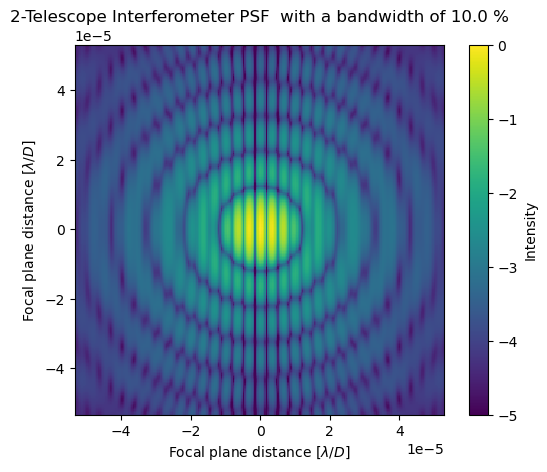

In [10]:
# Reset the wavelength
wl = 1e-6 # m
# Set the bandwidth to 10% of the wavelength
bandwidth = 0.1 * wl
# Set the number of monochromatic walength one will sum
n_mono = 10
# Initialize the total focal
focal_total = 0.

# Define a Fraunhofer Propagator
prop = FraunhoferPropagator(pupil_grid, focal_grid, focal_length=10)

# Sum the images for each wavelength                             
for wlen in np.linspace(wl - bandwidth / 2., wl + bandwidth / 2., n_mono):
    wavefront = Wavefront(field, wlen)
    focal_total += prop(wavefront).intensity
    
# Plot the PSF
imshow_field(np.log10(focal_total / focal_total.max()), vmin=-5)

plt.title('2-Telescope Interferometer PSF  with a bandwidth of {:.1f} %'.format(bandwidth * 100 / wl))
plt.xlabel('Focal plane distance [$\lambda/D$]')
plt.ylabel('Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'Intensity')
plt.savefig('2_telescopes_interferometer_PSF_wl_var.png')

### Ditto for an extended circular aperture such that 0.05B < D < 0.5B 

$\underline{\text{D = 0.05B:}}$

We don't see anything and it's a really bad idea to construct such a telesocpe.

$\underline{\text{D = 0.5B:}}$

We have a PSF equivalent and an OTF equivalent to the one of the 2 telescopes interferometer

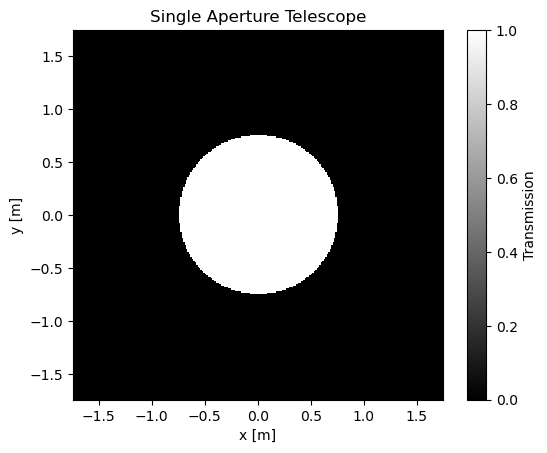

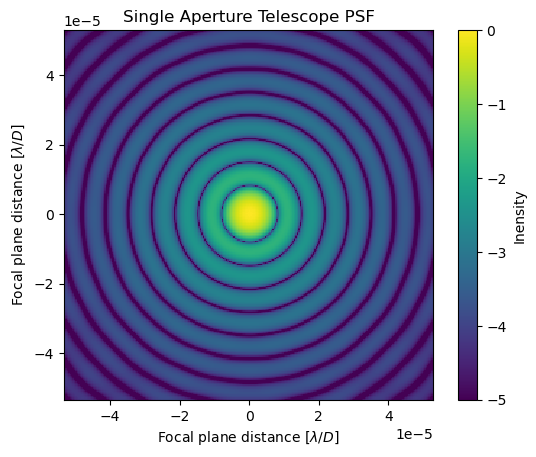

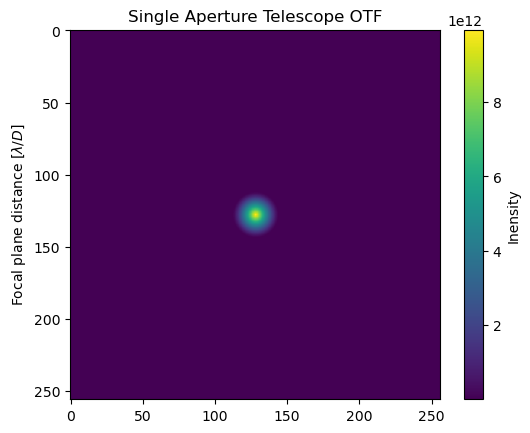

In [11]:
# Define the size of the mirror
D = 0.5*B # m

# Create the pupil of a single aperture telescope
telescope_pupil, pupil_grid = Make_Single_Aperture(D)

# Plot the field of the mirrors
im = imshow_field(telescope_pupil, pupil_grid, cmap='gray')
plt.title(r'Single Aperture Telescope')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.show()

# Get the PSF
focal_image, focal_grid = Get_PSF(telescope_pupil, wl, f, B)
# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'Single Aperture Telescope PSF')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'Inensity')
plt.show()

# Get the OTF
real_otf = Get_OTF(focal_image)
# Plot the OTF
plt.imshow(real_otf)
plt.title(r'Single Aperture Telescope OTF')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'Inensity')
plt.show()